Tweet Generation

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
import re
import operator
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from operator import itemgetter

In [4]:
cd drive

/content/drive


In [5]:
cd Tweet-Like-Trump-master/

/content/drive/Tweet-Like-Trump-master


In [6]:
import pandas as pd

data = pd.read_csv(r"Trump_tweets.csv")
data.head()

,Tweet,Date and Time,Tweet Id
0,Five of our incredible @Cabinet Secretaries ar...,3/14/2018 13:54,9.740000e+17
1,Perhaps at no time in history have the busines...,3/14/2018 13:12,9.740000e+17
2,Hundreds of good people including very importa...,3/14/2018 13:02,9.740000e+17
3,All across this nation we pray for our country...,3/14/2018 0:34,9.740000e+17
4,It was my great honor to deliver a message at ...,3/14/2018 0:25,9.740000e+17


## Inspect the data

In [7]:
data.shape

(30388, 3)

In [0]:
# Create a variable for the tweets
tweets = data.Tweet.loc[0:10000]


In [9]:
# Inspect some of the tweets
x = 0
for i in range(x,x+10):
    print(tweets[i])
    print()

Five of our incredible @Cabinet Secretaries are testifying on the Hill this morning on the need to rebuild our Nation’s crumbling infrastructure. We need to build FAST &amp; we need to build for our FUTURE. Thank you @SenateCommerce for hosting this hearing! #InfrastructureInAmerica

Perhaps at no time in history have the business fundamentals of U.S. companies been better than they are today!

Hundreds of good people including very important Ambassadors and Judges are being blocked and/or slow walked by the Democrats in the Senate. Many important positions in Government are unfilled because of this obstruction. Worst in U.S. history!

All across this nation we pray for our country and we THANK GOD for our United States Marines! Thank you. God Bless You. And God Bless America! https://t.co/vKXBd0CGH1

It was my great honor to deliver a message at the Marine Corps Air Station Miramar to our GREAT U.S. Military straight from the heart of the American People: We support you we thank you w

# Prepare the Input Data

In [0]:
def clean_tweet(tweet):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
#     tweet = tweet.lower()
#     tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'[_"\-;%()|.,+&=*%]', '', tweet)
    tweet = re.sub(r'\.', ' . ', tweet)
    tweet = re.sub(r'\!', ' !', tweet)
    tweet = re.sub(r'\?', ' ?', tweet)
    tweet = re.sub(r'\,', ' ,', tweet)
    tweet = re.sub(r':', ' : ', tweet)
    tweet = re.sub(r'#', ' # ', tweet)
    tweet = re.sub(r'@', ' @ ', tweet)
    tweet = re.sub(r'd .c .', 'd.c.', tweet)
    tweet = re.sub(r'u .s .', 'd.c.', tweet)
    tweet = re.sub(r' amp ', ' and ', tweet)
    tweet = re.sub(r'pm', ' pm ', tweet)
    tweet = re.sub(r'news', ' news ', tweet)
    tweet = re.sub(r' . . . ', ' ', tweet)
    tweet = re.sub(r' .  .  . ', ' ', tweet)
    tweet = re.sub(r' ! ! ', ' ! ', tweet)
    tweet = re.sub(r'&amp', 'and', tweet)
    return tweet

In [0]:
clean_tweets = []
for tweet in tweets:
    tweet = clean_tweet(tweet)
    if len(tweet) > 0:
        clean_tweets.append(tweet)


In [12]:
x = 0
for i in range(x,x+10):
    print(clean_tweets[i])  
    print()

Five of our incredible  @ Cabinet Secretaries are testifying on the Hill this morning on the need to rebuild our Nation’s crumbling infrastructure We need to build FAST and we need to build for our FUTURE Thank you  @ SenateCommerce for hosting this hearing !  # InfrastructureInAmerica

Perhaps at no time in history have the business fundamentals of US companies been better than they are today !

Hundreds of good people including very important Ambassadors and Judges are being blocked and/or slow walked by the Democrats in the Senate Many important positions in Government are unfilled because of this obstruction Worst in US history !

All across this nation we pray for our country and we THANK GOD for our United States Marines ! Thank you God Bless You And God Bless America ! https : //tco/vKXBd0CGH1

It was my great honor to deliver a message at the Marine Corps Air Station Miramar to our GREAT US Military straight from the heart of the American People :  We support you we thank you w

In [13]:
# Count the total number of occurences of each word
word_counts = {}
for tweet in clean_tweets:
    for word in tweet.split():
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
print("Size of Vocabulary:", len(word_counts.keys()))


# Load GloVe's embeddings
embeddings_index = {}
with open('glove.twitter.27B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings:', len(embeddings_index))


# Create an 'average' embedding for each tweet

embedding_dim = 200 # Use 200 to match GloVe's embedding size

embed_tweets = [] # Contains the 'average' embedding for each tweet
total_embeds = 0 
null_embeds = 0 

for tweet in clean_tweets:
    avg_embed = np.zeros(embedding_dim) # Set default embedding for each tweet
    for word in tweet.split():
        total_embeds += 1
        embed = embeddings_index.get(word)
        if embed is not None:
            avg_embed += embed # Add embedding's values to vectors
        else:
            null_embeds += 1
    embed_tweets.append(avg_embed/len(tweet.split()))

print("Total Number of Embeddings:", total_embeds)
print("Number of Null Embeddings:", null_embeds)
print("% of Embeddings that are Null: {}%".format(round(null_embeds/total_embeds,4)*100))

Size of Vocabulary: 22931
Word embeddings: 1193514
Total Number of Embeddings: 215469
Number of Null Embeddings: 67459
% of Embeddings that are Null: 31.31%


In [0]:
def clean_tweet(tweet):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    tweet = tweet.lower()
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'[_"\-;%()|.,+&=*%]', '', tweet)
    tweet = re.sub(r'\.', ' . ', tweet)
    tweet = re.sub(r'\!', ' !', tweet)
    tweet = re.sub(r'\?', ' ?', tweet)
    tweet = re.sub(r'\,', ' ,', tweet)
    tweet = re.sub(r':', ' : ', tweet)
    tweet = re.sub(r'#', ' # ', tweet)
    tweet = re.sub(r'@', ' @ ', tweet)
    tweet = re.sub(r'd .c .', 'd.c.', tweet)
    tweet = re.sub(r'u .s .', 'd.c.', tweet)
    tweet = re.sub(r' amp ', ' and ', tweet)
    tweet = re.sub(r'pm', ' pm ', tweet)
    tweet = re.sub(r'news', ' news ', tweet)
    tweet = re.sub(r' . . . ', ' ', tweet)
    tweet = re.sub(r' .  .  . ', ' ', tweet)
    tweet = re.sub(r' ! ! ', ' ! ', tweet)
    tweet = re.sub(r'&amp', 'and', tweet)
    return tweet

In [0]:
# Clean the tweets and append those with a length > 0 to the clean_tweets list
clean_tweets = []
for tweet in tweets:
    tweet = clean_tweet(tweet)
    if len(tweet) > 0:
        clean_tweets.append(tweet)

In [0]:
# Check to ensure the tweets have been clean properly
x = 0
for i in range(x,x+10):
    print(clean_tweets[i])  
    print()

five of our incredible  @ cabinet secretaries are testifying on the hill this morning on the need to rebuild our nation’s crumbling infrastructure we need to build fast and we need to build for our future thank you  @ senatecommerce for hosting this hearing !  # infrastructureinamerica

perhaps at no time in history have the business fundamentals of us companies been better than they are today !

hundreds of good people including very important ambassadors and judges are being blocked and/or slow walked by the democrats in the senate many important positions in government are unfilled because of this obstruction worst in us history !

all across this nation we pray for our country and we thank god for our united states marines ! thank you god bless you and god bless america ! 

it was my great honor to deliver a message at the marine corps air station miramar to our great us military straight from the heart of the american people :  we support you we thank you we love you  and we will 

In [0]:
# Count the total number of occurences of each word
word_counts = {}
for tweet in clean_tweets:
    for word in tweet.split():
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
print("Size of Vocabulary:", len(word_counts.keys()))

Size of Vocabulary: 15314


In [0]:
# Load GloVe's embeddings
embeddings_index = {}
with open('glove.twitter.27B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings:', len(embeddings_index))

Word embeddings: 1193514


In [0]:
# Create an 'average' embedding for each tweet

embedding_dim = 200 # Use 200 to match GloVe's embedding size

embed_tweets = [] # Contains the 'average' embedding for each tweet
total_embeds = 0 
null_embeds = 0 

for tweet in clean_tweets:
    avg_embed = np.zeros(embedding_dim) # Set default embedding for each tweet
    for word in tweet.split():
        total_embeds += 1
        embed = embeddings_index.get(word)
        if embed is not None:
            avg_embed += embed # Add embedding's values to vectors
        else:
            null_embeds += 1
    embed_tweets.append(avg_embed/len(tweet.split()))

print("Total Number of Embeddings:", total_embeds)
print("Number of Null Embeddings:", null_embeds)
print("% of Embeddings that are Null: {}%".format(round(null_embeds/total_embeds,4)*100))

Total Number of Embeddings: 202786
Number of Null Embeddings: 16406
% of Embeddings that are Null: 8.09%


In [0]:
# Reduce the dimensions of each tweet to 1
pca = PCA(n_components=1, random_state = 2)
pca_tweets = pca.fit_transform(embed_tweets)

In [0]:
# Order the tweets based on their PCA values, from low to high
# Similar tweets will be closer together
pca_tweets_list = [] # Contains the pca values
for tweet in pca_tweets:
    pca_tweets_list.append(tweet[0])

order = np.array(pca_tweets_list).argsort()
pca_labels = order.argsort()
pca_labels *= 2 # Multiple the labels by 2 so generated tweets can have odd values and 
                # Even values will represent tweets that were used for training

In [0]:
# Inspect pca_labels
pca_labels[:10]

array([ 7540,   532,  4510,  2054,   712,   646,  5366,  6786,  8930,
       10114], dtype=int64)

In [0]:
# Group tweets by similarity
kmeans = KMeans(n_clusters=4, max_iter = 1000, n_init = 20, random_state=2).fit(pca_tweets)
labels = kmeans.labels_

Note: After checking the results of using 3 - 10 clusters, I thought 4 clusters can best sort Trump's tweets into distinct groups.

In [0]:
# The number of tweets in each group.
pd.DataFrame(labels)[0].value_counts()

1    4069
3    3418
0    2097
2     414
Name: 0, dtype: int64

In [0]:
# Words to not include when finding the most common words in each group
stop_words = ['be','on','!','at','.',':','...','@',',','#','will','.m','in','a','the','with','to','by','and','my','is',
              'of','for','new','via','are','that','has','have','all','as','it','so','they','do','he','just','this',
              'was','who','your','from','his','about','get','but','am','up','if','can','would','than','should','dont',
              'had','or','were','did','there','got','even','its','an']

In [0]:
def top_n_words(group, n_words):
    '''Find the n most common words in each group'''
    vocab = {} # Create the vocabulary for each group
    for i in range(len(clean_tweets)):
        if labels[i] == group:
            for word in clean_tweets[i].split():
                if word not in vocab:
                    vocab[word] = 1
                else:
                    vocab[word] += 1
      
    # Sort the vocab from most to least common words
    sorted_vocab = sorted(vocab.items(), key=operator.itemgetter(1), reverse=True)
    top_n_words = []
    for word, value in sorted_vocab:
        if word not in stop_words:
            top_n_words.append(word)
        if len(top_n_words) == n_words:
            break
    print(top_n_words)

In [0]:
# The most common words in each group
groups = len(np.unique(labels))
for i in range(groups):
    print("Group #",i+1)
    top_n_words(i, 10)

Group # 1
['realdonaldtrump', 'trump', 'you', 'thank', 'trump2016', '?', 'rt', 'news', 'makeamericagreatagain', 'great']
Group # 2
['i', 'great', 'you', 'we', 'our', 'not', 'people', 'me', 'very', 'america']
Group # 3
['makeamericagreatagain', 'trump2016', 'realdonaldtrump', 'trump', '?', 'rt', 'you', 'thank', 'poll', 'cnn']
Group # 4
['you', 'i', 'realdonaldtrump', 'trump', 'great', 'thank', 'we', '?', 'news', 'our']


In [0]:
# The most common words for all of Trump's tweets
n_words = 100
sorted_vocab = sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True)
top_n_words = []
for word, value in sorted_vocab:
    if word not in stop_words:
        top_n_words.append(word)
    if len(top_n_words) == n_words:
        break
print("Trump's {} most popular tweeted words (not including stop words):".format(n_words))
print(top_n_words)

Trump's 100 most popular tweeted words (not including stop words):
['i', 'you', 'great', 'realdonaldtrump', 'trump', 'we', 'our', 'thank', '?', 'news', 'not', 'me', 'people', 'america', 'hillary', 'very', 'rt', 'trump2016', 'us', 'out', 'no', 'make', 'again', 'now', 'president', 'makeamericagreatagain', 'big', 'more', 'fox', 'country', 'today', 'time', 'clinton', 'what', 'many', 'vote', 'like', 'their', 'donald', 'cnn', 'pm', 'one', 'going', 'never', 'poll', 'been', 'back', 'much', 'media', 'only', 'jobs', 'want', 'she', 'crooked', 'good', 'american', 'last', 'why', 'when', 'her', 'tonight', 'bad', 'said', 'win', 'fake', 'debate', 'join', 'obama', 'must', 'them', 'how', 'job', 'tax', 'cruz', 'need', 'see', 'years', 'campaign', 'support', 'after', 'night', 'day', 'him', 'go', 'love', 'down', "don't", 'being', 'really', 'first', 'watch', 'election', 'over', 'way', 'foxandfriends', 'tomorrow', 'made', 'doing', 'democrats', 'against']


In [0]:
def print_tweet_group(group, n_tweets):
    '''Prints the first n_tweets in a group'''
    count = 1
    for i in range(len(clean_tweets)):
        if labels[i] == group:
            print("#{}: {}".format(count, clean_tweets[i]))
            count += 1
            if count == n_tweets+1:
                break

In [0]:
# Print the first few tweets in each group
n_tweets = 5
for i in range(groups):
    print("Group #",i+1)
    print_tweet_group(i,n_tweets)
    print()

Group # 1
#1: join me live in moon township pennsylvania at 7 : 00 pm e great crowd for a  # maga rally !
#2: jobs jobs jobs !  # maga 
#3: “presidential proclamation on adjusting imports of aluminum into the united states”  proclamation :  
#4: “presidential proclamation on adjusting imports of steel into the united states” proclamation :  
#5: great meeting with  @ cabinet at the  @ whitehouse today !  # maga 

Group # 2
#1: five of our incredible  @ cabinet secretaries are testifying on the hill this morning on the need to rebuild our nation’s crumbling infrastructure we need to build fast and we need to build for our future thank you  @ senatecommerce for hosting this hearing !  # infrastructureinamerica
#2: perhaps at no time in history have the business fundamentals of us companies been better than they are today !
#3: hundreds of good people including very important ambassadors and judges are being blocked and/or slow walked by the democrats in the senate many important position

The four groups look like they can be categorized as:
1. Short with many # or @
2. Retweets with long texts
3. Relating to data/time/location
4. Longer tweets written by Trump

In [0]:
# Visualize the tweets with TSNE
model = TSNE(n_components=2, random_state=2)
TSNE_tweets = model.fit_transform(embed_tweets)

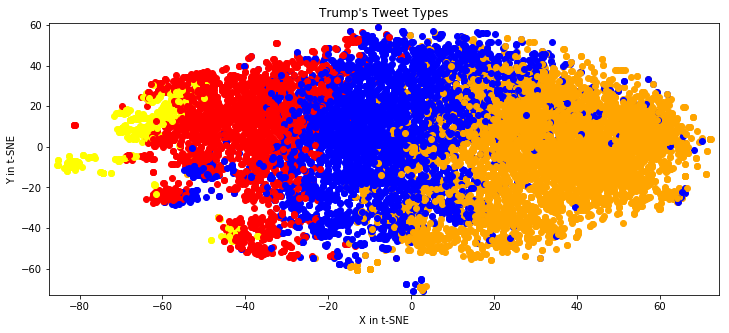

In [0]:
# Build a scatter plot to visualize the tweets.
color_map = {0:'red', 1:'orange', 2:'yellow', 3:'blue'}
plt.figure(figsize=(12,5))

for i in range(len(TSNE_tweets)):
    plt.scatter(x = TSNE_tweets[i][0], 
                y = TSNE_tweets[i][1],
                c = color_map[labels[i]])
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.title('Trump\'s Tweet Types')

offset = 2
x_min = min(TSNE_tweets, key=itemgetter(0))[0] - offset
x_max = max(TSNE_tweets, key=itemgetter(0))[0] + offset
y_min = min(TSNE_tweets, key=itemgetter(1))[1] - offset
y_max = max(TSNE_tweets, key=itemgetter(1))[1] + offset

axes = plt.gca()
axes.set_xlim([x_min,x_max])
axes.set_ylim([y_min,y_max])
plt.show()

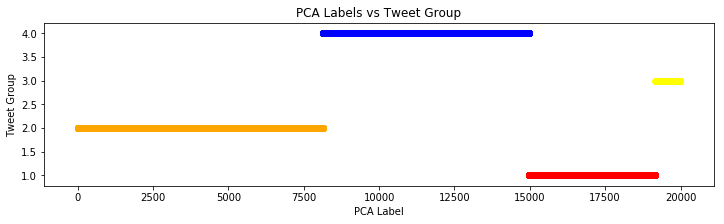

In [0]:
# Create a scatterplot to visualize the tweet groups by the PCA labels
plt.figure(figsize=(12,3))
for i in range(len(TSNE_tweets)):
    plt.scatter(x = pca_labels[i], 
                y = labels[i]+1,
                c = color_map[labels[i]])
    
plt.xlabel('PCA Label')
plt.ylabel('Tweet Group')
plt.title('PCA Labels vs Tweet Group')
    
plt.show()

There's a little bit of overlap between the PCA labels and tweet groups at the extremes, otherwise, it's really nice to see the tweets organized as well as they are.

In [0]:
# Limit the vocab that we will use to words that appear ≥ threshold 

threshold = 1

#dictionary to convert words to integers
vocab_to_int = {} 

value = 0
for word, count in word_counts.items():
    if count >= threshold:
        vocab_to_int[word] = value
        value += 1

# Special tokens that will be added to our vocab
codes = ["<UNK>","<GO>","<PAD>","<EOS>"]   

for code in codes:
    vocab_to_int[code] = len(vocab_to_int)+1

# Dictionary to convert integers to words
int_to_vocab = {}
for word, value in vocab_to_int.items():
    int_to_vocab[value] = word

word_ratio = round(len(vocab_to_int) / len(word_counts),4)*100

print("Total Number of Unique Words:", len(word_counts))
print("Number of Words we will use:", len(vocab_to_int))
print("Percent of Words we will use: {}%".format(word_ratio))


Total Number of Unique Words: 15314
Number of Words we will use: 15318
Percent of Words we will use: 100.03%


Note: We could use more words, but that would make it more difficult to train the model. I think it would be better to use fewer words and make very similar tweets than use more words that look less like Trump's tweets.

In [0]:
# Change the tweets from words to integers
# If word is not in vocab, replace it with <UNK> (unknown)
int_tweets = []

for tweet in clean_tweets:
    int_tweet = []
    for word in tweet.split():
        if word in vocab_to_int:
            int_tweet.append(vocab_to_int[word])
        else:
            int_tweet.append(vocab_to_int["<UNK>"])
    int_tweets.append(int_tweet)

In [0]:
# Find the length of tweets
lengths = []
for tweet in int_tweets:
    lengths.append(len(tweet))

# Create a dataframe so that the values can be inspected
lengths = pd.DataFrame(lengths, columns=['counts'])

In [0]:
lengths.describe()

,counts
count,9998.000000
mean,20.282657
std,8.230385
min,1.000000
25%,15.000000
50%,21.000000
75%,25.000000
max,56.000000


In [0]:
# Keep only the tweets that are between the min and max lengths and ≤ the <UNK> limit

max_tweet_length = 50
min_tweet_length = 1
unk_limit = 1

short_tweets = []
short_labels = []

for i in range(len(int_tweets)):
    unk_count = 0
    if len(int_tweets[i]) <= max_tweet_length and len(int_tweets[i]) >= min_tweet_length:
        if len(int_tweets[i]) == 1:
            if int_tweets[i][0] != vocab_to_int['<UNK>']:
                short_tweets.append(int_tweets[i])
                short_labels.append(pca_labels[i])
        else:
            for word in int_tweets[i]:
                if word == vocab_to_int['<UNK>']:
                    unk_count += 1
            if unk_count <= unk_limit:
                short_tweets.append(int_tweets[i])
                short_labels.append(pca_labels[i])
        

usage_precent = round(len(short_tweets)/len(clean_tweets),4)*100
        
print("Total Number of Tweets:", len(clean_tweets))
print("Number of Tweets we will use:", len(short_tweets))
print("Percent of Tweets we will use: {}%".format(usage_precent))

Total Number of Tweets: 9998
Number of Tweets we will use: 9953
Percent of Tweets we will use: 99.55000000000001%


In [0]:
# Sort tweets by length to train faster and reduce padding.
sorted_tweets = []
sorted_labels = []

for length in range(1,max_tweet_length+1):
    for i in range(len(short_tweets)):
        if length == len(short_tweets[i]):
            sorted_tweets.append(short_tweets[i])
            sorted_labels.append([short_labels[i]])
            
print(len(sorted_tweets))
print(len(sorted_labels))

9953
9953


In [0]:
# Find the number/ratio of words that are <UNK>
n_words = 0
unk_words = 0
for tweet in sorted_tweets:
    for int in tweet:
        n_words += 1
        if int == vocab_to_int["<UNK>"]:
            unk_words += 1
            
unk_ratio = round(unk_words/n_words,4)*100
            
print("Total Number of Words:", n_words)
print("Number of uses of <UNK>:", unk_words)
print("Percent of words that are <UNK>: {}%".format(unk_ratio))

Total Number of Words: 200419
Number of uses of <UNK>: 0
Percent of words that are <UNK>: 0.0%


Note: I wanted to limit the number of times UNK is used in the training data, which is why the UNK limit is set to just one.

## Build and Train the Model

In [0]:
def model_inputs():
    '''Create palceholders for inputs to the model'''
    input_data = tf.placeholder(tf.int32, [None, None], name='input')
    targets = tf.placeholder(tf.int32, [None, None], name='targets')
    lr = tf.placeholder(tf.float32, name='learning_rate')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')

    return input_data, targets, lr, keep_prob

In [0]:
def process_encoding_input(target_data, vocab_to_int, batch_size):
    '''Remove the last id from each batch and concat the <GO> to the begining of each batch'''
    ending = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    dec_input = tf.concat([tf.fill([batch_size, 1], vocab_to_int['<GO>']), ending], 1)

    return dec_input

In [0]:

def lstm_cell(rnn_size):
    return tf.contrib.rnn.BasicLSTMCell(rnn_size)
def stack_lstm(num_layers):
    stacked_lstm = tf.contrib.rnn.MultiRNNCell([lstm_cell(rnn_size) for _ in range(num_layers)])
    return stacked_lstm

In [0]:
def encoding_layer(rnn_inputs, rnn_size, num_layers, keep_prob, sequence_length):
    '''Create the encoding layer'''
    lstm = lstm_cell(rnn_size)
    enc_cell = stack_lstm(num_layers)
    _, enc_state = tf.nn.dynamic_rnn(enc_cell,
                                     rnn_inputs, 
                                     sequence_length,
                                     dtype=tf.float32)
    return enc_state

In [0]:
def decoding_layer_train(encoder_state, dec_cell, dec_embed_input, sequence_length, decoding_scope,
                         output_fn, keep_prob, batch_size):
    '''Decode the training data'''
    train_decoder_fn = tf.contrib.seq2seq.simple_decoder_fn_train(encoder_state)
    train_pred, _, _ = tf.contrib.seq2seq.dynamic_rnn_decoder(
        dec_cell, train_decoder_fn, dec_embed_input, sequence_length, scope=decoding_scope)
    train_pred_drop = tf.nn.dropout(train_pred, keep_prob)
    return output_fn(train_pred_drop)    

In [0]:
def decoding_layer_infer(encoder_state, dec_cell, dec_embeddings, start_of_sequence_id, end_of_sequence_id,
                         maximum_length, vocab_size, decoding_scope, output_fn):
    '''Decode the prediction data'''
    infer_decoder_fn = tf.contrib.seq2seq.simple_decoder_fn_inference(
        output_fn, encoder_state, dec_embeddings, start_of_sequence_id, end_of_sequence_id, maximum_length, vocab_size)
    infer_logits, _, _ = tf.contrib.seq2seq.dynamic_rnn_decoder(
        dec_cell, infer_decoder_fn, scope=decoding_scope)
    return infer_logits

In [0]:
def decoding_layer(dec_embed_input, dec_embeddings, encoder_state, vocab_size, sequence_length, rnn_size,
                   num_layers, vocab_to_int, keep_prob, batch_size):
    '''Create the decoding cell and input the parameters for the training and inference decoding layers'''
    with tf.variable_scope("decoding") as decoding_scope:
        lstm = lstm_cell(rnn_size)
    
        drop = tf.contrib.rnn.DropoutWrapper(lstm, input_keep_prob = keep_prob)
        dec_cell = stack_lstm(num_layers)
        
        weights = tf.truncated_normal_initializer(mean = 0.0, stddev=0.1)
        biases = tf.zeros_initializer()
        output_fn = lambda x: tf.contrib.layers.fully_connected(x, 
                                                                vocab_size, 
                                                                None, 
                                                                scope=decoding_scope,
                                                                weights_initializer = weights,
                                                                biases_initializer = biases)

        train_logits = decoding_layer_train(encoder_state, 
                                            dec_cell, 
                                            dec_embed_input, 
                                            sequence_length, 
                                            decoding_scope, 
                                            output_fn, 
                                            keep_prob, 
                                            batch_size)
        decoding_scope.reuse_variables()
        infer_logits = decoding_layer_infer(encoder_state, 
                                            dec_cell, 
                                            dec_embeddings, 
                                            vocab_to_int['<GO>'],
                                            vocab_to_int['<EOS>'], 
                                            sequence_length - 1, 
                                            vocab_size,
                                            decoding_scope, 
                                            output_fn)

    return train_logits, infer_logits

In [0]:
def one2seq_model(input_data, target_data, keep_prob, batch_size, sequence_length, vocab_size, 
                  embedding_size, rnn_size, num_layers, vocab_to_int):
    '''Use the previous functions to create the training and inference logits'''
    enc_embed_input = tf.contrib.layers.embed_sequence(input_data, 
                                                       max(short_labels)+1, 
                                                       embedding_size,
                                                       initializer = tf.random_uniform_initializer(-1,1))
    enc_state = encoding_layer(enc_embed_input, rnn_size, num_layers, keep_prob, sequence_length)

    dec_input = process_encoding_input(target_data, vocab_to_int, batch_size)
    dec_embeddings = tf.Variable(tf.random_uniform([vocab_size+1, embedding_size], -1, 1))

    dec_embed_input = tf.nn.embedding_lookup(dec_embeddings, 
                                             dec_input)
    
    train_logits, infer_logits = decoding_layer(dec_embed_input, 
                                                dec_embeddings, 
                                                enc_state, 
                                                vocab_size, 
                                                sequence_length, 
                                                rnn_size, 
                                                num_layers, 
                                                vocab_to_int, 
                                                keep_prob, 
                                                batch_size)
    return train_logits, infer_logits

In [0]:
def pad_tweets_batch(tweets_batch):
    """Pad tweets with <PAD> so that each tweet of a batch has the same length"""
    max_tweet = max([len(tweet) for tweet in tweets_batch])
    return [tweet + [vocab_to_int['<PAD>']] * (max_tweet - len(tweet)) for tweet in tweets_batch]

In [0]:
def get_batches(labels, tweets, batch_size):
    """Batch labels and tweets together"""
    for batch_i in range(0, len(labels)//batch_size):
        start_i = batch_i * batch_size
        labels_batch = np.array(labels[start_i:start_i + batch_size])
        tweets_batch = tweets[start_i:start_i + batch_size]
        padded_tweets_batch = np.array(pad_tweets_batch(tweets_batch))
        yield labels_batch, padded_tweets_batch

In [0]:
# Set the Hyperparameters
epochs = 100
batch_size = 32
rnn_size = 512
num_layers = 2
embedding_size = 200
learning_rate = 0.005
keep_probability = 0.5

In [0]:
# Build the graph
train_graph = tf.Graph()
# Set the graph to default to ensure that it is ready for training
with train_graph.as_default():
    
    # Load the model inputs    
    input_data, targets, lr, keep_prob = model_inputs()
    # Sequence length will be the max tweet length for each batch
    sequence_length = tf.placeholder_with_default(max_tweet_length, None, name='sequence_length')
    # Find the shape of the input data for sequence_loss
    input_shape = tf.shape(input_data)

    # Create the training and inference logits
    train_logits, inference_logits = one2seq_model(input_data, 
                                                   targets, 
                                                   keep_prob, 
                                                   batch_size, 
                                                   sequence_length, 
                                                   len(vocab_to_int), 
                                                   embedding_size, 
                                                   rnn_size, 
                                                   num_layers, 
                                                   vocab_to_int)

    # Create a tensor for the inference logits, needed to load a checkpoint version of the model
    tf.identity(inference_logits, 'logits')

    with tf.name_scope("optimization"):
        # Loss function
        cost = tf.contrib.seq2seq.sequence_loss(
            train_logits,
            targets,
            tf.ones([input_shape[0], sequence_length]))

        # Optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate)

        # Gradient Clipping
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -5., 5.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)

AttributeError: module 'tensorflow.contrib.seq2seq' has no attribute 'simple_decoder_fn_train'

Note: There is no validation data because it did not prove to be a good indicator for the quality of the generated tweets. 

In [0]:
# Train the Model
learning_rate_decay = 0.9
min_learning_rate = 0.0005
display_step = 20 # Check training loss after every 20 batches
stop_early = 0 
stop = 3 # If the epoch loss does decrease in 3 consecutive epochs, stop training
epoch_check = ((len(sorted_labels))//batch_size)-1 # Modulus for checking epoch loss
epoch_loss = 0 
batch_loss = 0
summary_epoch_loss = [] # Record the epoch loss for saving improvements in the model

checkpoint = "best_model.ckpt" 

with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch_i in range(1, epochs+1):
        epoch_loss = 0
        batch_loss = 0
        
        for batch_i, (labels_batch, tweets_batch) in enumerate(
                get_batches(sorted_labels, sorted_tweets, batch_size)):
            start_time = time.time()
            _, loss = sess.run(
                [train_op, cost],
                {input_data: labels_batch,
                 targets: tweets_batch,
                 lr: learning_rate,
                 sequence_length: tweets_batch.shape[1],
                 keep_prob: keep_probability})

            batch_loss += loss
            epoch_loss += loss
            end_time = time.time()
            batch_time = end_time - start_time

            if batch_i % display_step == 0 and batch_i > 0:
                print('Epoch {:>3}/{} Batch {:>4}/{} - Loss: {:>6.3f}, Seconds: {:>4.2f}'
                      .format(epoch_i,
                              epochs, 
                              batch_i, 
                              len(sorted_labels) // batch_size, 
                              batch_loss / display_step, 
                              batch_time*display_step))
                batch_loss = 0

            if batch_i % epoch_check == 0 and batch_i > 0:
                print("Average loss for this epoch:", round(epoch_loss/epoch_check,3))
                summary_epoch_loss.append(epoch_loss)
                
                # If the epoch loss is at a new minimum, save the model
                if epoch_loss <= min(summary_epoch_loss):
                    print('New Record!') 
                    stop_early = 0
                    saver = tf.train.Saver() 
                    saver.save(sess, checkpoint)

                else:
                    print("No Improvement.")
                    stop_early += 1
                    if stop_early == stop:
                        break
                    
        # Reduce learning rate, but not below its minimum value
        learning_rate *= learning_rate_decay
        if learning_rate < min_learning_rate:
            learning_rate = min_learning_rate
        
        if stop_early == stop:
            print("Stopping Training.")
            break

## Generate New Tweets

In [0]:
def vectorize_tweet(tweet):
    '''Just like for the training data, this creates the average embedding for the inputted tweet'''
    vect_tweet = []
    vectors = np.zeros(embedding_dim)
    for word in tweet.split():
        vector = embeddings_index.get(word)
        if vector is not None:
            vectors += vector
    return vectors/len(tweet.split())

As the reminder, the 4 tweet groups had the ranges:
1. 14,400 - 14,736
  - ex. # makeamericagreatagain  # 6days 
2. 5,500 - 11,000 
  - ex. rt  @ donaldjtrumpjr :  final push ! eric and i doing dozens of radio interviews we can win this thing ! get out and vote !  # maga  # electionday
3. 11,000 - 14,400 
  - ex. watching the returns at 9 : 45 pm # electionnight  # maga 
4. 0 - 5,500
  - ex. busy day planned in new york will soon be making some very important decisions on the people who will be running our government !

In [0]:
# Select type of tweet
tweet_type = 14501

checkpoint = "./" + checkpoint

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph(checkpoint + '.meta')
    loader.restore(sess, checkpoint)

    input_data = loaded_graph.get_tensor_by_name('input:0')
    logits = loaded_graph.get_tensor_by_name('logits:0')
    sequence_length = loaded_graph.get_tensor_by_name('sequence_length:0')
    keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')

    tweet_logits = sess.run(logits, {input_data: [[tweet_type]], 
                                     sequence_length: np.random.randint(3,15),
                                     keep_prob: 1.0})[0] 

# Remove the padding from the tweet
pad = vocab_to_int["<PAD>"]

print('Tweet')
print('  Word Ids:      {}'.format([i for i in np.argmax(tweet_logits, 1) if i != pad]))
print('  Tweet: {}'.format(" ".join([int_to_vocab[i] for i in np.argmax(tweet_logits, 1) if i != pad])))

Tweet
  Word Ids:      [1247, 908, 809, 881, 224, 1334, 224, 719]
  Tweet: thank you arizona ! # makeamericagreatagain # trump2016
